# Project-9

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

from wordcloud import WordCloud
from datetime import datetime, timedelta

# plt.style_use('ggplot')
sns.set_palette('pastel')
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/spotify_history.csv")

df.head(10)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
5,50VNvhzyaSplJCKWchN7a8,2013-07-08 03:17:52,web player,63485,Impossible,James Arthur,Impossible,clickrow,clickrow,False,False
6,1I4EczxGBcPR3J3KeyqFJP,2013-07-08 03:17:56,web player,0,We Own The Sky,M83,Saturdays = Youth,nextbtn,nextbtn,False,False
7,5arVt2Wg0zbiWwAOZef2Nl,2013-07-08 03:17:56,web player,1268,Higher Ground - Remastered 2003,Red Hot Chili Peppers,Mother's Milk,nextbtn,nextbtn,False,False
8,1ixtaZc0Adil3yD1ItPqSl,2013-07-08 03:17:58,web player,0,Happy Up Here,Röyksopp,Happy Up Here,nextbtn,nextbtn,False,False
9,2v5mpowLQNFN7NC46l0bJS,2013-07-08 03:19:11,web player,0,Phantom,Justice,Phantom,nextbtn,clickrow,False,False


In [ ]:
df['ts'] = pd.to_datetime(df['ts'])
df = df[df['ms_played'] > 0].copy()

In [ ]:
df.head(10)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
5,50VNvhzyaSplJCKWchN7a8,2013-07-08 03:17:52,web player,63485,Impossible,James Arthur,Impossible,clickrow,clickrow,False,False
7,5arVt2Wg0zbiWwAOZef2Nl,2013-07-08 03:17:56,web player,1268,Higher Ground - Remastered 2003,Red Hot Chili Peppers,Mother's Milk,nextbtn,nextbtn,False,False
10,07hII2Rc29q4F2nTE3P1od,2013-07-08 03:20:20,web player,67587,Sun - Gildas Kitsunй Club Night Short Remix,Two Door Cinema Club,The Kitsuné Special Edition #3 (Kitsuné Maison...,clickrow,clickrow,False,False
11,4kO7mrAPfqIrsKwUOK5BFx,2013-07-08 03:20:36,web player,12846,Midnight City,M83,"Hurry Up, We're Dreaming",clickrow,clickrow,False,False
12,4oTIuUmpE2xdXrpon9lgfJ,2013-07-08 03:21:13,web player,36132,Heaven,Emeli Sandé,Our Version Of Events,clickrow,clickrow,False,False
13,49h0RYK3yzWkfbVyNJjJ01,2013-07-08 03:22:51,web player,95817,Do I Wanna Know?,Arctic Monkeys,Do I Wanna Know?,clickrow,clickrow,False,False


In [ ]:
df['date'] = df['ts'].dt.date
df['year'] = df['ts'].dt.year
df['month'] = df['ts'].dt.month
df['day'] = df['ts'].dt.day
df['weekday'] = df['ts'].dt.day_name()
df['hour'] = df['ts'].dt.hour

In [ ]:
df['minutes_played'] = df['ms_played'] / 60000

In [ ]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,date,year,month,day,weekday,hour,minutes_played
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False,2013-07-08,2013,7,8,Monday,2,0.053083
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,2013-07-08,2013,7,8,Monday,2,1.031083
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,2013-07-08,2013,7,8,Monday,2,4.756433
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,2013-07-08,2013,7,8,Monday,2,2.233700
5,50VNvhzyaSplJCKWchN7a8,2013-07-08 03:17:52,web player,63485,Impossible,James Arthur,Impossible,clickrow,clickrow,False,False,2013-07-08,2013,7,8,Monday,3,1.058083


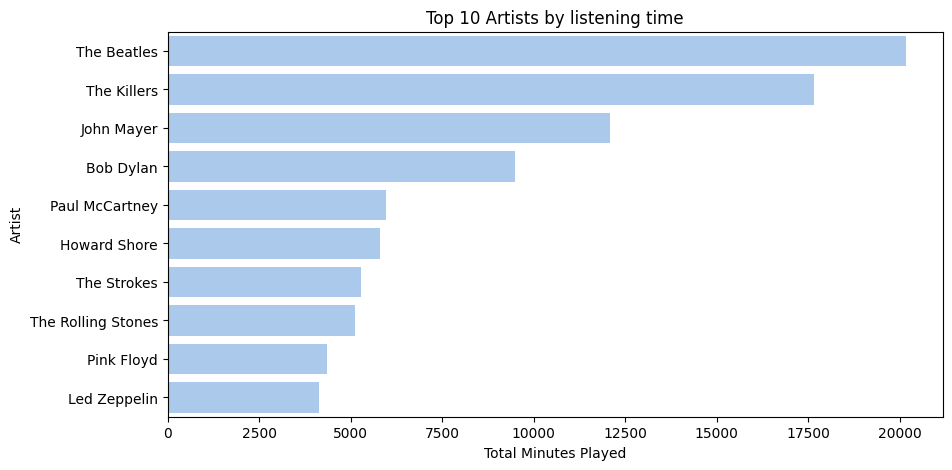

In [ ]:
top_artists = df.groupby('artist_name')['minutes_played'].sum().sort_values(ascending= False).head(10)
plt.figure(figsize = (10, 5))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title("Top 10 Artists by listening time")
plt.xlabel("Total Minutes Played")
plt.ylabel('Artist')
plt.show()

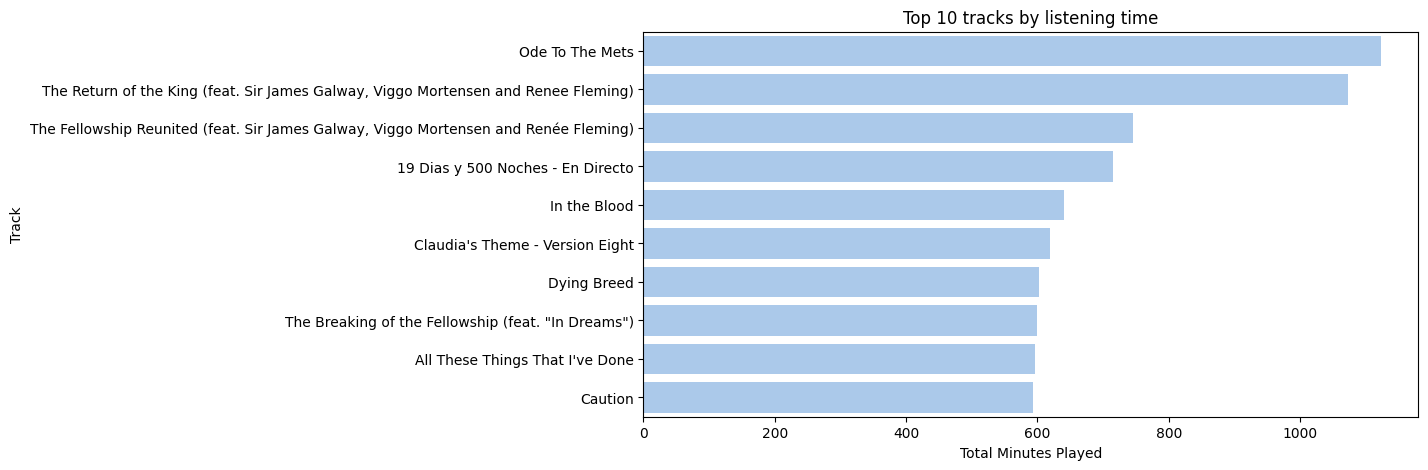

In [ ]:
top_tracks = df.groupby('track_name')['minutes_played'].sum().sort_values(ascending= False).head(10)
plt.figure(figsize = (10, 5))
sns.barplot(x=top_tracks.values, y=top_tracks.index)
plt.title("Top 10 tracks by listening time")
plt.xlabel("Total Minutes Played")
plt.ylabel('Track')
plt.show()

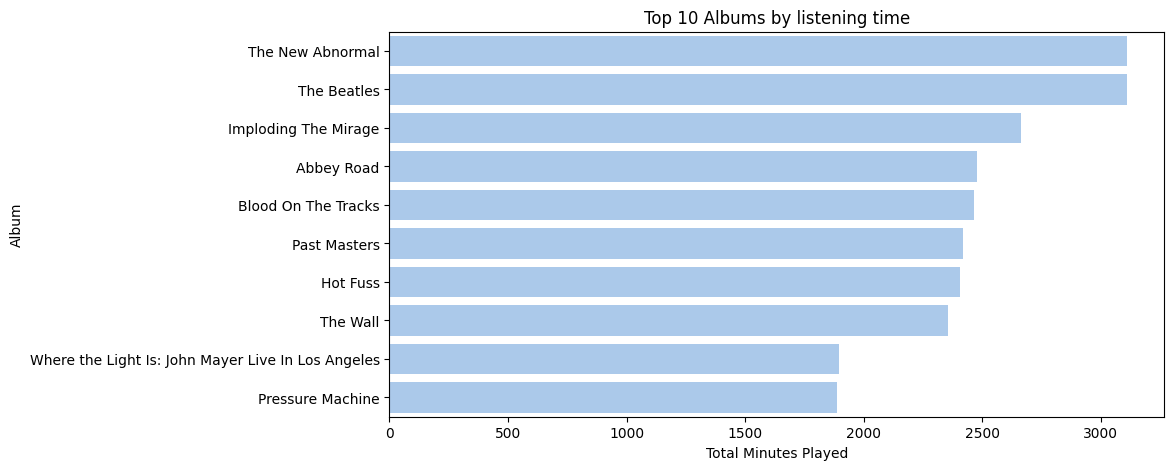

In [ ]:
top_albums = df.groupby('album_name')['minutes_played'].sum().sort_values(ascending= False).head(10)
plt.figure(figsize = (10, 5))
sns.barplot(x=top_albums.values, y=top_albums.index)
plt.title("Top 10 Albums by listening time")
plt.xlabel("Total Minutes Played")
plt.ylabel('Album')
plt.show()

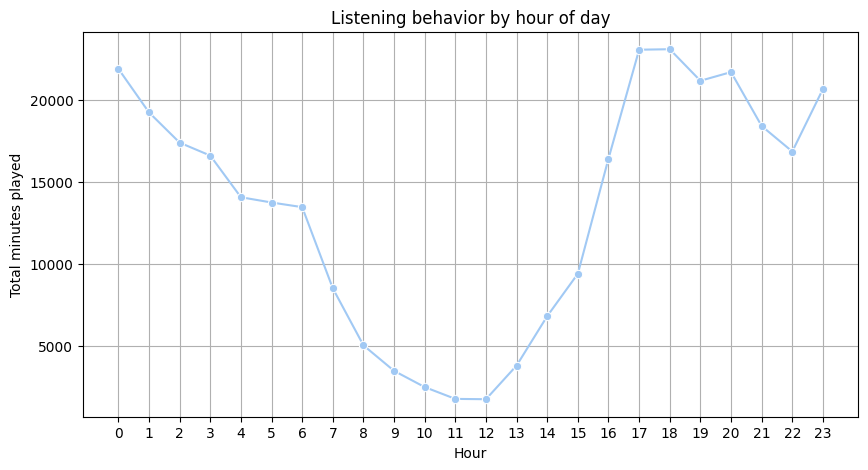

In [ ]:
# listening by hour of day
hourly_play = df.groupby('hour')['minutes_played'].sum()
plt.figure(figsize = (10, 5))
sns.lineplot(x=hourly_play.index, y=hourly_play.values, marker='o')
plt.title("Listening behavior by hour of day")
plt.xlabel("Hour")
plt.ylabel('Total minutes played')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

Text(0, 0.5, 'Total minutes played')

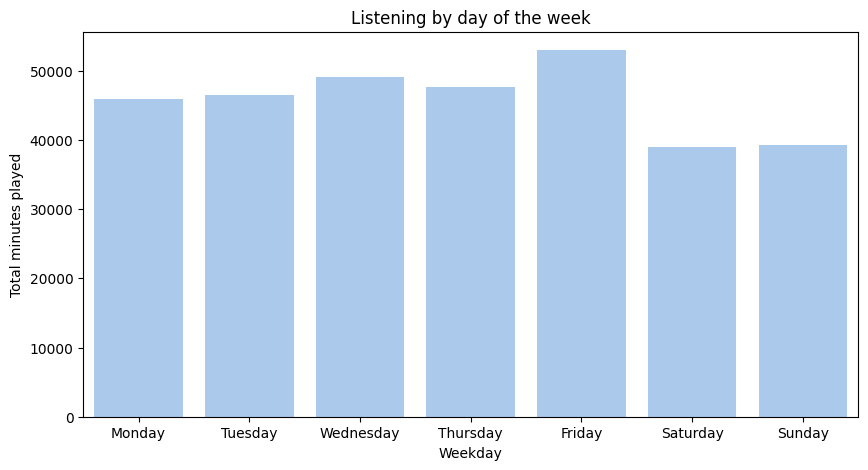

In [ ]:
# listening by day of the week
weekday_play = df.groupby('weekday')['minutes_played'].sum()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize = (10, 5))
sns.barplot(x=weekday_order, y=weekday_play[weekday_order])
plt.title("Listening by day of the week")
plt.xlabel("Weekday")
plt.ylabel('Total minutes played')

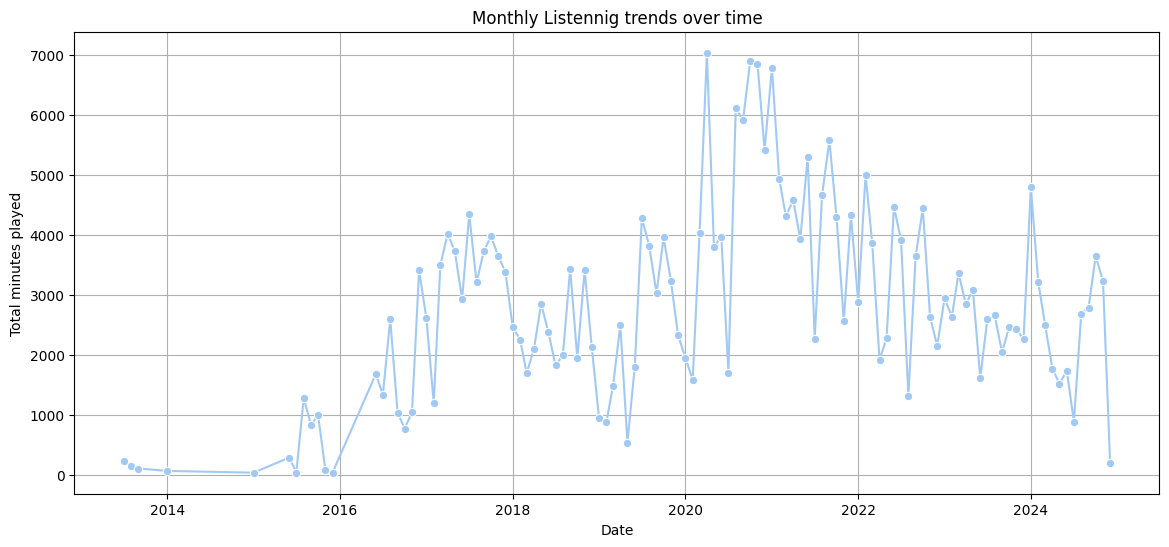

In [ ]:
# monthly listening trends over years
monthly_trend = df.groupby(['year', 'month'])['minutes_played'].sum().reset_index()
monthly_trend['year_month'] = pd.to_datetime(monthly_trend[['year', 'month']].assign(day=1))
plt.figure(figsize = (14, 6))
sns.lineplot(data=monthly_trend, x='year_month', y='minutes_played', marker = 'o')
plt.title("Monthly Listennig trends over time")
plt.xlabel("Date")
plt.ylabel('Total minutes played')
plt.grid(True)
plt.show()

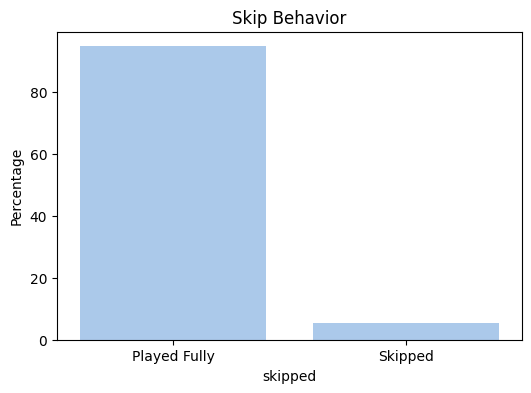

In [ ]:
# playback behavior analysis
skip_counts = df['skipped'].value_counts(normalize=True) * 100
plt.figure(figsize=(6,4))
sns.barplot(x=skip_counts.index.map({True: 'Skipped', False: 'Played Fully'}), y=skip_counts.values)
plt.title('Skip Behavior')
plt.ylabel('Percentage')
plt.show()

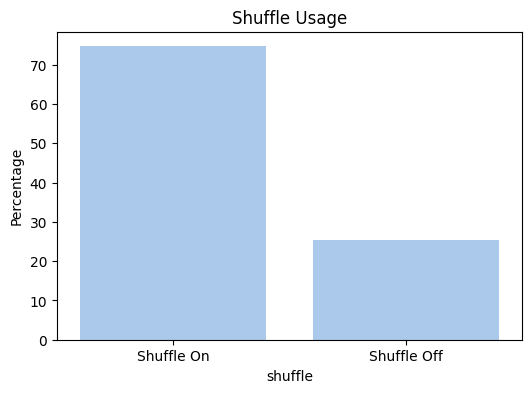

In [ ]:
shuffle_counts = df['shuffle'].value_counts(normalize=True) * 100
plt.figure(figsize=(6,4))
sns.barplot(x=shuffle_counts.index.map({True: 'Shuffle On', False: 'Shuffle Off'}), y=shuffle_counts.values)
plt.title('Shuffle Usage')
plt.ylabel('Percentage')
plt.show()

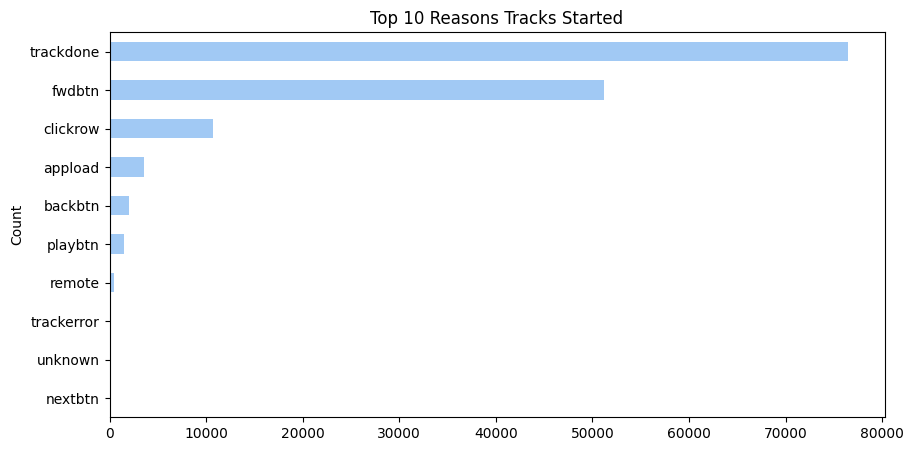

In [ ]:
plt.figure(figsize=(10,5))
df['reason_start'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Reasons Tracks Started')
plt.ylabel('Count')
plt.gca().invert_yaxis()
plt.show()

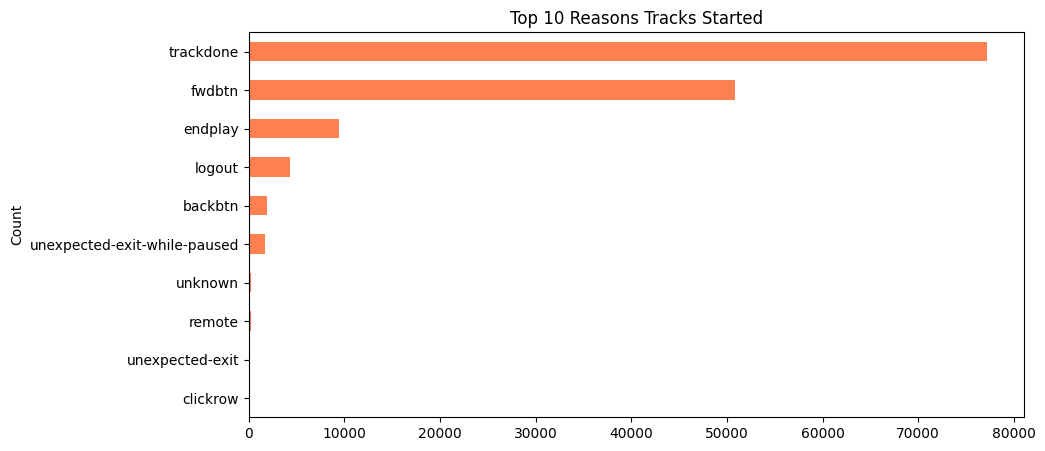

In [ ]:
plt.figure(figsize=(10,5))
df['reason_end'].value_counts().head(10).plot(kind='barh', color='coral')
plt.title('Top 10 Reasons Tracks Started')
plt.ylabel('Count')
plt.gca().invert_yaxis()
plt.show()

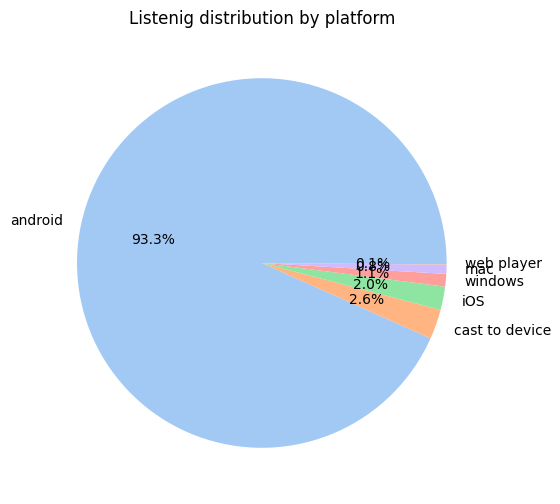

In [ ]:
platform_usage = df['platform'].value_counts()
platform_usage.plot(kind = 'pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Listenig distribution by platform')
plt.ylabel('')
plt.show()

### Prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Araştıralım.
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df.columns

Index(['spotify_track_uri', 'ts', 'platform', 'ms_played', 'track_name',
       'artist_name', 'album_name', 'reason_start', 'reason_end', 'shuffle',
       'skipped', 'date', 'year', 'month', 'day', 'weekday', 'hour',
       'minutes_played'],
      dtype='object')

ÖDEV: Kullanıcı davranışını analiz edip hangi şarkılar daha sık atlanıyor?

> Blok alıntı ekle



Amacımız: Bİr kullanıcı, bir şarkıyı neden ve nasıl başlattı ve bitirdi gibi bilgiler kullanılarak şarkının atlanıp atlanmayacağı tahmin edilmeye çalışıllacak.

In [ ]:
drop_cols = ['spotify_track_uri', 'ts', 'track_name', 'artist_name', 'album_name', ]